<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [111]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from spacy.tokenizer import Tokenizer

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [87]:
from bs4 import BeautifulSoup
import requests

df = pd.read_csv('./data/job_listings.csv')
df.shape

(426, 3)

In [88]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
description,"b""<div><div>Job Requirements:</div><ul><li><p>...",b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,b'<div><p>As a Data Scientist you will be work...,"b'<div class=""jobsearch-JobMetadataHeader icl-...",b'<ul><li>Location: USA \xe2\x80\x93 multiple ...
title,Data scientist,Data Scientist I,Data Scientist - Entry Level,Data Scientist,Data Scientist


In [57]:
df['description']

0      b"<div><div>Job Requirements:</div><ul><li><p>...
1      b'<div>Job Description<br/>\n<br/>\n<p>As a Da...
2      b'<div><p>As a Data Scientist you will be work...
3      b'<div class="jobsearch-JobMetadataHeader icl-...
4      b'<ul><li>Location: USA \xe2\x80\x93 multiple ...
                             ...                        
421    b"<b>About Us:</b><br/>\nWant to be part of a ...
422    b'<div class="jobsearch-JobMetadataHeader icl-...
423    b'<div class="jobsearch-JobMetadataHeader icl-...
424    b"<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...
425    b'<div></div><div><div><div><div><p>Cerner Int...
Name: description, Length: 426, dtype: object

In [98]:
df = pd.read_csv('./data/job_listings.csv')
soup = BeautifulSoup(df['description'][0])
text = soup.get_text()
df['description'] = [BeautifulSoup(text).get_text() for text in 
                     df['description']]

In [99]:
df['description']

0      b"Job Requirements:\nConceptual understanding ...
1      b'Job Description\n\nAs a Data Scientist 1, yo...
2      b'As a Data Scientist you will be working on c...
3      b'$4,969 - $6,756 a monthContractUnder the gen...
4      b'Location: USA \xe2\x80\x93 multiple location...
                             ...                        
421    b"About Us:\nWant to be part of a fantastic an...
422    b'InternshipAt Uber, we ignite opportunity by ...
423    b'$200,000 - $350,000 a yearA million people a...
424    b"SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...
425    b'Cerner Intelligence is a new, innovative org...
Name: description, Length: 426, dtype: object

In [104]:
# df2 = pd.read_csv('./data/job_listings.csv')
# soup = BeautifulSoup(df2['description'][0])
# text = soup.get_text()
# df2['description'] = [BeautifulSoup(text).get_text() for text in 
#                      df2['description']]

# df2['description'] = df2['description'].apply(lambda x: 1.0 if x == 'b\\"' else x)
# df2['description']

# I'm unsure why this doesn't work 

In [100]:
# df['description'] = df['description'].replace({'b': ' '})
df['description'] = [x[2:] for x in df['description']]
df['description'] 

0      Job Requirements:\nConceptual understanding in...
1      Job Description\n\nAs a Data Scientist 1, you ...
2      As a Data Scientist you will be working on con...
3      $4,969 - $6,756 a monthContractUnder the gener...
4      Location: USA \xe2\x80\x93 multiple locations\...
                             ...                        
421    About Us:\nWant to be part of a fantastic and ...
422    InternshipAt Uber, we ignite opportunity by se...
423    $200,000 - $350,000 a yearA million people a y...
424    SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nABOU...
425    Cerner Intelligence is a new, innovative organ...
Name: description, Length: 426, dtype: object

In [103]:
# From chat

test = df['description'].apply(lambda x : re.sub(r'\\n', "", x))
test

0      Job Requirements:Conceptual understanding in M...
1      Job DescriptionAs a Data Scientist 1, you will...
2      As a Data Scientist you will be working on con...
3      $4,969 - $6,756 a monthContractUnder the gener...
4      Location: USA \xe2\x80\x93 multiple locations2...
                             ...                        
421    About Us:Want to be part of a fantastic and fu...
422    InternshipAt Uber, we ignite opportunity by se...
423    $200,000 - $350,000 a yearA million people a y...
424    SENIOR DATA SCIENTISTJOB DESCRIPTIONABOUT USAm...
425    Cerner Intelligence is a new, innovative organ...
Name: description, Length: 426, dtype: object

In [107]:
# Since 'test' works, let's actually apply it

df['description'] = df['description'].apply(lambda x : re.sub(r'\\n', "", x))

In [108]:
df['description']

0      Job Requirements:Conceptual understanding in M...
1      Job DescriptionAs a Data Scientist 1, you will...
2      As a Data Scientist you will be working on con...
3      $4,969 - $6,756 a monthContractUnder the gener...
4      Location: USA \xe2\x80\x93 multiple locations2...
                             ...                        
421    About Us:Want to be part of a fantastic and fu...
422    InternshipAt Uber, we ignite opportunity by se...
423    $200,000 - $350,000 a yearA million people a y...
424    SENIOR DATA SCIENTISTJOB DESCRIPTIONABOUT USAm...
425    Cerner Intelligence is a new, innovative organ...
Name: description, Length: 426, dtype: object

In [109]:
df.head()

,Unnamed: 0,description,title
0,0,Job Requirements:Conceptual understanding in M...,Data scientist
1,1,"Job DescriptionAs a Data Scientist 1, you will...",Data Scientist I
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist
4,4,Location: USA \xe2\x80\x93 multiple locations2...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [112]:
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [113]:
tokens = []
for doc in tokenizer.pipe(df['description'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['spaCy_tokens'] = tokens
df['spaCy_tokens'].head()

0    [Job, Requirements:Conceptual, understanding, ...
1    [Job, DescriptionAs, a, Data, Scientist, 1,, y...
2    [As, a, Data, Scientist, you, will, be, workin...
3    [$4,969, -, $6,756, a, monthContractUnder, the...
4    [Location:, USA, \xe2\x80\x93, multiple, locat...
Name: spaCy_tokens, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [127]:
df

,Unnamed: 0,description,title,spaCy_tokens
0,0,Job Requirements:Conceptual understanding in M...,Data scientist,"[Job, Requirements:Conceptual, understanding, ..."
1,1,"Job DescriptionAs a Data Scientist 1, you will...",Data Scientist I,"[Job, DescriptionAs, a, Data, Scientist, 1,, y..."
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[As, a, Data, Scientist, you, will, be, workin..."
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[$4,969, -, $6,756, a, monthContractUnder, the..."
4,4,Location: USA \xe2\x80\x93 multiple locations2...,Data Scientist,"[Location:, USA, \xe2\x80\x93, multiple, locat..."
...,...,...,...,...
421,421,About Us:Want to be part of a fantastic and fu...,Senior Data Science Engineer,"[About, Us:Want, to, be, part, of, a, fantasti..."
422,422,"InternshipAt Uber, we ignite opportunity by se...",2019 PhD Data Scientist Internship - Forecasti...,"[InternshipAt, Uber,, we, ignite, opportunity,..."
423,423,"$200,000 - $350,000 a yearA million people a y...",Data Scientist - Insurance,"[$200,000, -, $350,000, a, yearA, million, peo..."
424,424,SENIOR DATA SCIENTISTJOB DESCRIPTIONABOUT USAm...,Senior Data Scientist,"[SENIOR, DATA, SCIENTISTJOB, DESCRIPTIONABOUT,..."


In [130]:
from sklearn.feature_extraction.text import CountVectorizer

# create the transformer
vect = CountVectorizer(stop_words='english')

# Fit the vectorizer to learn vocab and transform the data into dtm
dtm = vect.fit_transform(df['description'])

# Convert the dtm to pandas dataframe
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
print(dtm.shape)
dtm.head()

(426, 11808)


,00,000,000pay,02115job,03,0356,04,062,06366,08,...,zenreach,zero,zeus,zf,zheng,zillow,zonesability,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

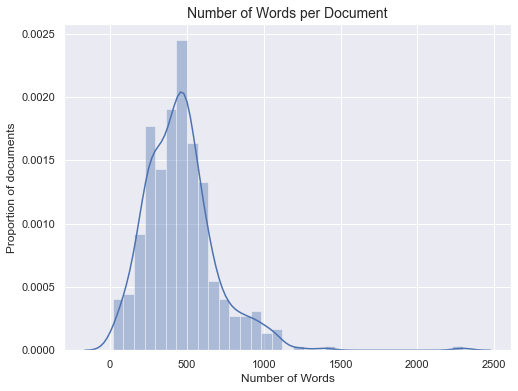

In [133]:
import seaborn as sns
sns.set()

def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.
    
    # Arguments
        samples_texts: list, sample texts.
    """
    num_words = [len(s.split()) for s in sample_texts]
    
    plt.figure(figsize=(8,6))
    sns.distplot(num_words)
    plt.title('Number of Words per Document', fontsize=14)
    plt.xlabel('Number of Words', fontsize=12)
    plt.ylabel('Proportion of documents', fontsize=12)
    plt.show()
    
plot_sample_length_distribution(df['description'])

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

The purpose of TF-IDF is to find what is unique to each document. Because of this we will penalize the term frequencies of words that are common across all documents which will allow for each document's most different topics to rise to the top.

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english',
                        tokenizer = tokenize,
                        ngram_range = (1,2),
                        min_df = 3, 
                        max_df = 0.5,
                        max_features = 5000
                       )

# Create a vocabulary and tf-idf score per document
dtm = tfidf.fit_transform(df['description'])

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

(426, 5000)


,$,"$ 100,000",+,+ city,+ year,+ years\xe2\x80\x99,0,1,1 year,10,...,you\xe2\x80\x99ll,you\xe2\x80\x99ll develop,you\xe2\x80\x99ll work,you\xe2\x80\x99re,you\xe2\x80\x99re look,you\xe2\x80\x99ve,youyou,yrs,|,||
0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.030831,0.0,0.033665,0.0,0.0,0.116256,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.248879,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.137284,0.0,0.149903,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [135]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [149]:
ideal_description = [ """
Python
Remote
Passionate
Dedicated
Research
"""]

new = tfidf.transform(ideal_description)
new

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [150]:
nn.kneighbors(new.todense())

(array([[1.24620485, 1.24620485, 1.24968057, 1.32436052, 1.32511685]]),
 array([[123,  23, 256, 173, 321]]))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 